# Artifical Neural Nets to Predict the Weather

## Importing Libraries

In [43]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.utils import to_categorical

## Data Pre-Processing

### Importing Data

In [44]:
data = pd.read_csv("../Datasets/weather_classification_data.csv")

data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [45]:
data.shape

(13200, 11)

In [46]:
data.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

### Null Value Analysis

In [47]:
data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

### General Overview of the Data

In [48]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


Outliers do exist in this dataset. Temperature in °C is above 100°C and the Precipitation and the Humidity Percentage being above 100%. This shows that outliers are existing and they need to be removed from this dataset

### Outlier Detection

In [49]:
cleaned_df = data.copy()

for column in data.columns:
    if data[column].dtype != 'object':
        lq = round(data[column].quantile(0.25), 2)
        up = round(data[column].quantile(0.75), 2)
        iqr = round(up - lq, 2)
        
        upper_limit = round(up + 1.5 * iqr, 2)
        lower_limit = round(lq - 1.5 * iqr, 2)
        
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_limit) & (cleaned_df[column] <= upper_limit)]
        
cleaned_df = cleaned_df[(cleaned_df['Humidity'] <= 100) & (cleaned_df['Precipitation (%)'] <= 100)]

cleaned_df.reset_index(drop = True)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
11164,29.0,62,13.0,17.0,overcast,1002.81,2,Spring,5.0,coastal,Cloudy
11165,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
11166,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
11167,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [50]:
cleaned_df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13194,29.0,62,13.0,17.0,overcast,1002.81,2,Spring,5.0,coastal,Cloudy
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [51]:
cleaned_df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,11169.000000,11169.000000,11169.000000,11169.000000,11169.000000,11169.000000,11169.000000
mean,18.730773,68.227952,9.045035,49.967052,1006.227645,3.447399,5.133226
std,15.489244,18.752368,5.483878,31.238422,12.953355,3.475577,2.578344
min,-24.000000,20.000000,0.000000,0.000000,962.880000,0.000000,0.000000
25%,5.000000,58.000000,5.000000,18.000000,995.780000,1.000000,3.000000
50%,21.000000,69.000000,8.500000,54.000000,1007.790000,2.000000,5.000000
75%,30.000000,82.000000,13.000000,78.000000,1016.280000,5.000000,7.500000
max,71.000000,100.000000,26.000000,100.000000,1049.200000,14.000000,14.000000


### Variable Selection

In [52]:
X = cleaned_df.drop('Weather Type', axis = 1)
y = cleaned_df['Weather Type']

display(X.head())
display(y.head())

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


0     Rainy
1    Cloudy
2     Sunny
3     Sunny
4     Rainy
Name: Weather Type, dtype: object

### Encoding

In [53]:
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X = np.array(X)
y = np.array(y)

le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

display(X.shape)

display(y.shape)

y

(11169, 15)

(11169, 4)

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

### Train-Test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [55]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating the ANN

### Initializing the ANN

In [56]:
ann = tf.keras.models.Sequential()

### Adding Input Layer and Hidden Layers

In [57]:
ann.add(tf.keras.layers.Dense(units = 20, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 20, activation = 'relu'))

### Adding Output Layer

In [58]:
ann.add(tf.keras.layers.Dense(units = 4, activation = 'softmax'))

## Training the ANN

### Compiling the ANN

In [59]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the ANN

In [60]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6383 - loss: 0.9066
Epoch 2/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.9490 - loss: 0.2131
Epoch 3/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.9643 - loss: 0.1456
Epoch 4/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9678 - loss: 0.1257  
Epoch 5/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9725 - loss: 0.1082  
Epoch 6/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9725 - loss: 0.1040
Epoch 7/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9732 - loss: 0.1025
Epoch 8/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9759 - loss: 0.0936
Epoch 9/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9767 - loss: 0.0859
Epoch 10/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9773 - loss: 0.0816
Epoch 11/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9761 - loss: 0.0872
Epoch 12/100
280/280 ━━━━━━━━━━━━

## Making Predictions and Evaluating the ANN Model

### Predicting the Test Set

In [61]:
y_pred = ann.predict(X_test)
y_pred_classes = le.inverse_transform(np.argmax(y_pred, axis=1))
true_y = le.inverse_transform(np.argmax(y_test, axis=1))

prediction_df = pd.DataFrame({'Actual': true_y, 'Predicted': y_pred_classes})
prediction_df


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Actual,Predicted
0,Sunny,Sunny
1,Snowy,Snowy
2,Cloudy,Cloudy
3,Rainy,Rainy
4,Sunny,Sunny
...,...,...
2229,Cloudy,Cloudy
2230,Cloudy,Cloudy
2231,Cloudy,Cloudy
2232,Cloudy,Cloudy


### Confusion Matrix

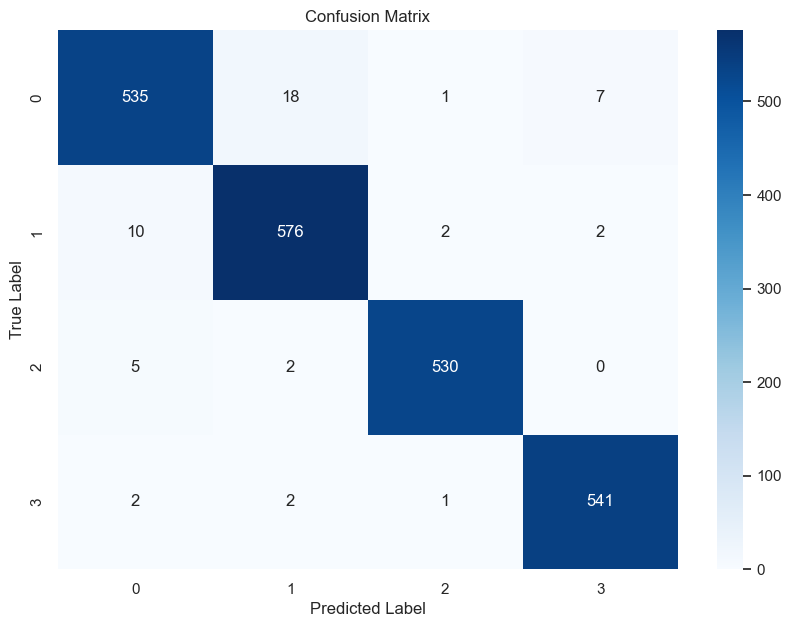

In [62]:
confusion_mtx = confusion_matrix(true_y, y_pred_classes)
confusion_mtx
plt.figure(figsize=(10, 7))

sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [63]:
accuracy = accuracy_score(true_y, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.67%
